In [1]:
# Import necessary libraries
import sys
sys.path.insert(0, '..')  # add the parent directory to path
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import librosa
import librosa.display
from sklearn.svm import OneClassSVM
import plotly.express as px
from get_mel_spectrogram import get_mel_spectrogram

In [2]:
# Directories
parent_dir = os.path.abspath('..')  # parent directory
# Audio data directory
data_dir = os.path.join(parent_dir, 'data', 'source')  # audio data directory
# Metada directory
metadata_dir = os.path.join(parent_dir, 'data', 'metadata')  # metadata directory

In [3]:
# Read the metadata file
df = pd.read_csv(os.path.join(metadata_dir, 'metadata.csv'), header=0, index_col=0)
df

,machine,model,anomaly,file_name,file_rel_path,duration_s,fs_Hz,SNR_dB
file_no,,,,,,,,
0,fan,0,1,00000000.wav,6_dB_fan\fan\id_00\abnormal\00000000.wav,10.0,16000,6
1,fan,0,1,00000001.wav,6_dB_fan\fan\id_00\abnormal\00000001.wav,10.0,16000,6
2,fan,0,1,00000002.wav,6_dB_fan\fan\id_00\abnormal\00000002.wav,10.0,16000,6
3,fan,0,1,00000003.wav,6_dB_fan\fan\id_00\abnormal\00000003.wav,10.0,16000,6
4,fan,0,1,00000004.wav,6_dB_fan\fan\id_00\abnormal\00000004.wav,10.0,16000,6
...,...,...,...,...,...,...,...,...
18014,valve,6,0,00000987.wav,6_dB_valve\valve\id_06\normal\00000987.wav,10.0,16000,6
18015,valve,6,0,00000988.wav,6_dB_valve\valve\id_06\normal\00000988.wav,10.0,16000,6
18016,valve,6,0,00000989.wav,6_dB_valve\valve\id_06\normal\00000989.wav,10.0,16000,6


In [4]:
# Randomly select a subset of samples for a single machine
machine = 'fan'
df_machine = df[df.machine=='fan']

df_machine = df_machine.groupby(["model", "anomaly"]).sample(frac=0.25, random_state=13)
df_machine.groupby(["model", "anomaly"])['file_name'].count().reset_index(name='count')

,model,anomaly,count
0,0,0,253
1,0,1,102
2,2,0,254
3,2,1,90
4,4,0,258
5,4,1,87
6,6,0,254
7,6,1,90


In [5]:
df_machine

,machine,model,anomaly,file_name,file_rel_path,duration_s,fs_Hz,SNR_dB
file_no,,,,,,,,
1112,fan,0,0,00000705.wav,6_dB_fan\fan\id_00\normal\00000705.wav,10.0,16000,6
407,fan,0,0,00000000.wav,6_dB_fan\fan\id_00\normal\00000000.wav,10.0,16000,6
477,fan,0,0,00000070.wav,6_dB_fan\fan\id_00\normal\00000070.wav,10.0,16000,6
1266,fan,0,0,00000859.wav,6_dB_fan\fan\id_00\normal\00000859.wav,10.0,16000,6
1059,fan,0,0,00000652.wav,6_dB_fan\fan\id_00\normal\00000652.wav,10.0,16000,6
...,...,...,...,...,...,...,...,...
4337,fan,6,1,00000163.wav,6_dB_fan\fan\id_06\abnormal\00000163.wav,10.0,16000,6
4190,fan,6,1,00000016.wav,6_dB_fan\fan\id_06\abnormal\00000016.wav,10.0,16000,6
4419,fan,6,1,00000245.wav,6_dB_fan\fan\id_06\abnormal\00000245.wav,10.0,16000,6


{'window': 0.5, 'window_length': 8000, 'overlap': 0.5, 'overlap_length': 4000, 'hop_length': 4000, 'n_fft': 8192, 'n_mels': 64, 'fmin': 0, 'fmax': 8000.0, 'mel_center_freq': array([  46.875   ,   93.75    ,  138.671875,  185.546875,  232.421875,
        279.296875,  324.21875 ,  371.09375 ,  417.96875 ,  464.84375 ,
        509.765625,  556.640625,  603.515625,  650.390625,  695.3125  ,
        742.1875  ,  789.0625  ,  835.9375  ,  880.859375,  927.734375,
        974.609375, 1021.484375, 1072.265625, 1125.      , 1179.6875  ,
       1238.28125 , 1298.828125, 1361.328125, 1427.734375, 1498.046875,
       1572.265625, 1648.4375  , 1730.46875 , 1814.453125, 1904.296875,
       1996.09375 , 2095.703125, 2197.265625, 2304.6875  , 2417.96875 ,
       2537.109375, 2660.15625 , 2791.015625, 2927.734375, 3072.265625,
       3222.65625 , 3380.859375, 3546.875   , 3720.703125, 3902.34375 ,
       4093.75    , 4294.921875, 4503.90625 , 4726.5625  , 4957.03125 ,
       5201.171875, 5455.078125, 5

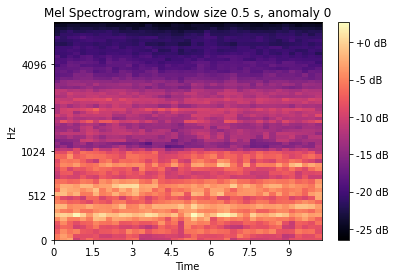

In [6]:
# Compute and plot mel spectrogram
no_file = 600
file_path = os.path.join(data_dir, df_machine.iloc[no_file].file_rel_path)
fs = df_machine.iloc[no_file].fs_Hz
window = 0.5 # 2
n_mels = 64
mel_spect, mel_spect_db, mfcc, params = get_mel_spectrogram(file_path, window=window, overlap=0.5, n_mels=n_mels, machine='pump') 

print(params)

print(f"Size of mel_spect: {mel_spect.shape}, total number of points: {mel_spect.size}")
librosa.display.specshow(mel_spect_db, sr=fs, hop_length=params['overlap_length'], x_axis='time', y_axis='mel');

plt.title(f"Mel Spectrogram, window size {params['window']} s, anomaly {df_machine.iloc[no_file].anomaly}");
plt.colorbar(format='%+2.0f dB');

array([  46.875 ,   93.75  ,  140.625 ,  187.5   ,  234.375 ,  281.25  ,
        328.125 ,  375.    ,  414.0625,  460.9375,  507.8125,  554.6875,
        601.5625,  648.4375,  695.3125,  742.1875,  789.0625,  835.9375,
        882.8125,  929.6875,  976.5625, 1023.4375, 1070.3125, 1125.    ,
       1179.6875, 1234.375 , 1296.875 , 1359.375 , 1429.6875, 1500.    ,
       1570.3125, 1648.4375, 1726.5625, 1812.5   , 1906.25  , 2000.    ,
       2093.75  , 2195.3125, 2304.6875, 2421.875 , 2539.0625, 2664.0625,
       2789.0625, 2929.6875, 3070.3125, 3218.75  , 3382.8125, 3546.875 ,
       3718.75  , 3906.25  , 4093.75  , 4296.875 , 4507.8125, 4726.5625,
       4960.9375, 5203.125 , 5453.125 , 5726.5625, 6000.    , 6296.875 ,
       6609.375 , 6929.6875, 7273.4375, 7625.    ])

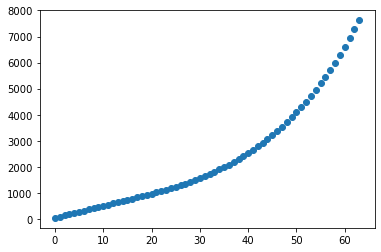

In [14]:
plt.scatter(range(len(params['mel_center_freq'])), params['mel_center_freq'])
params['mel_center_freq']

In [61]:
for idx, row in df_machine.iterrows():    
    file_path = os.path.join(data_dir, row.file_rel_path)
    fs = row.fs_Hz
    window = 0.1 # 2
    n_mels = 32
    mel_spect, mel_spect_db, mfcc, params = get_mel_spectrogram(file_path, 
                                                                window=window, 
                                                                n_mels=n_mels, 
                                                                machine='pump') 

machine                                               fan
model                                                   6
anomaly                                                 1
file_name                                    00000235.wav
file_rel_path    6_dB_fan\fan\id_06\abnormal\00000235.wav
duration_s                                             10
fs_Hz                                               16000
SNR_dB                                                  6
Name: 4409, dtype: object

{'window': 0.1, 'window_length': 1600, 'overlap': 0.5, 'overlap_length': 800, 'hop_length': 800, 'n_fft': 2048, 'n_mels': 32, 'fmin': 0, 'fmax': 8000.0, 'mel_center_freq': array([  93.75  ,  179.6875,  273.4375,  367.1875,  453.125 ,  546.875 ,
        640.625 ,  734.375 ,  820.3125,  914.0625, 1007.8125, 1101.5625,
       1210.9375, 1335.9375, 1468.75  , 1609.375 , 1773.4375, 1945.3125,
       2140.625 , 2351.5625, 2578.125 , 2835.9375, 3117.1875, 3421.875 ,
       3765.625 , 4132.8125, 4546.875 , 4992.1875, 5484.375 , 6031.25  ,
       6625.    , 7281.25  ])}
Size of mel_spect: (32, 201), total number of points: 6432


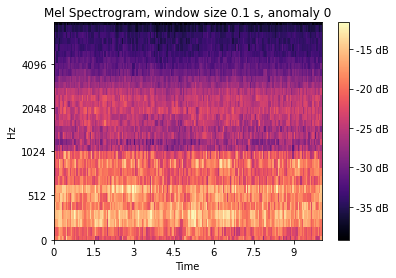

In [15]:
# Get mel spectrogram and mfcc features for each file
no_file = 600
file_path = os.path.join(data_dir, df_machine.iloc[no_file].file_rel_path)
fs = df_machine.iloc[no_file].fs_Hz
window = 0.1 # 2
n_mels = 32
mel_spect, mel_spect_db, mfcc, params = get_mel_spectrogram(file_path, window=window, overlap=0.5, n_mels=n_mels, machine='pump') 

print(params)

print(f"Size of mel_spect: {mel_spect_db.shape}, total number of points: {mel_spect_db.size}")
librosa.display.specshow(mel_spect_db, sr=fs, hop_length=params['overlap_length'], x_axis='time', y_axis='mel');

plt.title(f"Mel Spectrogram, window size {params['window']} s, anomaly {df_machine.iloc[no_file].anomaly}");
plt.colorbar(format='%+2.0f dB');

In [ ]:


# Classifying with classifier output
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.01)

svm.fit(X_training)
pred = svm.predict(X_training)

anom_index = where(pred==-1)
X_anomaly = X_training[anom_index]
